# Life expectancy and GDP

## Introduction
This project is dedicated to the study of the correlation between the economic output of a country and the life expectancy of its population.

The study focuses on data on GDP and life expectancy from 2000 to 2015 from six countries: Chile, China, Germany, Mexico, United States of America, Zimbabwe.

The main points this project will touch are the following:
 
 - What is the distribution of life expectancy for each country? What are the differences?
 - How does the mean of the GDP change between different countries? 
 - Have life expectancy and GDP grown over time? Is this trend similar for each country?
 - Are life expectancy and GDP correlated?
 

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Modules
Modules used throughout the project

In [35]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
#to hide warnings from plots:
import warnings
warnings.filterwarnings("ignore")

## Load and explore data
The data are loaded into a dataframe `df` from **all_data.csv**.

The dataset contains a total of 96 entries. The first 4 entries are printed with the `.head()` method to give a brief idea of the dataset content. The data is structure in 4 different columns: `Country`, `Year`, `Life expectancy at birth (years)` and `GDP`.

In [11]:
df = pd.read_csv('all_data.csv')
print('Total number of entries: {}.'.format(len(df)))
df.head()

Total number of entries: 96.


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The unique entries for `Country` are printed with the `.unique()` method. The dataset contains information from six different countries: Chile, China, Germany, Mexico, United States of America and Zimbabwe.

In [13]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


For each country, the data focus on a specific timeframe of 16 years, from 2000 to 2015. This can be checked with `.value_counts()`.

In [23]:
print(df.Year.value_counts())

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64


A general check of the (type of) content of the dataset can be obtained with `.info()`. There are no null entries.

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


For convenience, the column `Life expectancy at birth (years)` has been renamed to `Life_expectancy`.

In [26]:
df = df.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'})
df.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Introductory plots

This section includes some exploratory plots to get acquainted with the data.

The following table shows the mean of the life expectancy and GDP for each country for the time period between 2000 and 2015.

The same data can be better visualized and compared with two different plots:
- a boxplot showing the distribution for the life expectancy for each country.
- a barplot showing the average GDP for each country.

Note that the color scheme is mantained between the two plots, i.e. the same country is represented with the same color.

In [108]:
df.groupby('Country')[['Life_expectancy','GDP']].mean()

,Life_expectancy,GDP
Country,,
Chile,78.94375,1.697888e+11
China,74.26250,4.957714e+12
Germany,79.65625,3.094776e+12
Mexico,75.71875,9.766506e+11
United States of America,78.06250,1.407500e+13
Zimbabwe,50.09375,9.062580e+09


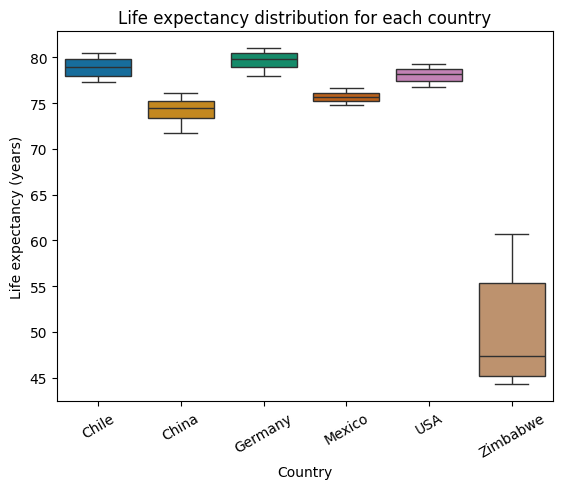

In [110]:
x_names = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
sns.boxplot(data=df, x='Country', y='Life_expectancy',palette='colorblind')
ax = plt.subplot()
ax.set_xticklabels(x_names)
plt.xticks(rotation=30,fontsize=10)
plt.title('Life expectancy distribution for each country')
plt.ylabel('Life expectancy (years)')
plt.show()

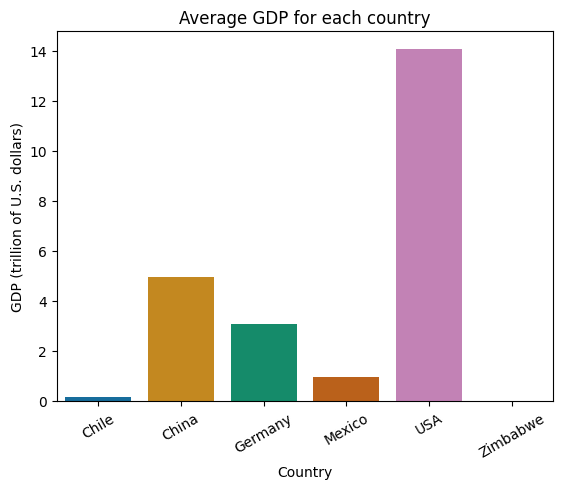

In [121]:
x_names = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
y_ticks = [i * 10**12 for i in range (0,16,2)]
y_ticks_names = [i for i in range (0,16,2)]
sns.barplot(data=df, x='Country', y='GDP',palette = 'colorblind', ci= None)
ax = plt.subplot()
ax.set_xticklabels(x_names)
plt.xticks(rotation=30,fontsize=10)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks_names)
plt.title('Average GDP for each country')
plt.ylabel('GDP (trillion of U.S. dollars)')
plt.show()

The first plot shows that all countries have a comparable life expectancy, between 75 and 80 years, with the exception of Zimbabwe, who has a much lower and more spreaded life expectancy with a mean around 50 years.

The second plot shows that the United States of America have a much higher GDP compared to all other countries, with an average GDP of 14 trillion of U.S. dollars. All other countries have a GDP below 6 trillion of dollars. Of particular note are Chile and Zimbabwe, both countries are barely distinguishable from the plot, with an average GDP of 0.17 and 0.01 trillion of U.S. dollars respectively.

## Time trends
This section explores the trend in time of both the life expectancy and the GDP for the different countries.

It is interesting to study the trend in time of life expectancy for each country, and understand if there is a common trend, e.g. a growth through time.

The first plot shows the trend for all countries (the color mapping is the same used in previous sections). All countries display a tendency in increasing life expectancy of their citizens. Of particular notice is the case of Zimbabwe. As seen previously, the life expectancy for its population is the lowest between all countries considered, almost half. In the beginning of the time window considered in this project, between 2000 and 2004, the life expectancy was decreasing. After 2004 the trend inverted, and the life expectancy continuosly grew over time, reaching 60 years by 2015.

To understand better the trend for each country, the second plot breaks out life expectancy by country. This plot better highlights the growth of life expectancy for all countries, while also allowing to a more careful analysis of the actual trend.

In [217]:
#selects the colorblind palette from seaborn
palette = sns.color_palette('colorblind')

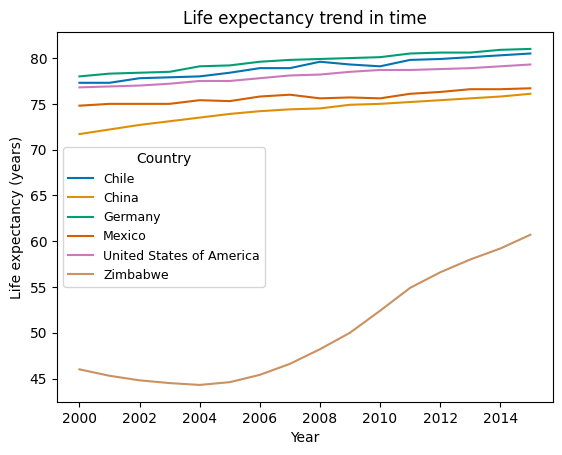

In [220]:
sns.lineplot(data=df, x='Year',y='Life_expectancy',hue='Country',palette='colorblind')
plt.legend(title='Country',fontsize=9)
plt.ylabel('Life expectancy (years)')
plt.title('Life expectancy trend in time')
plt.show()

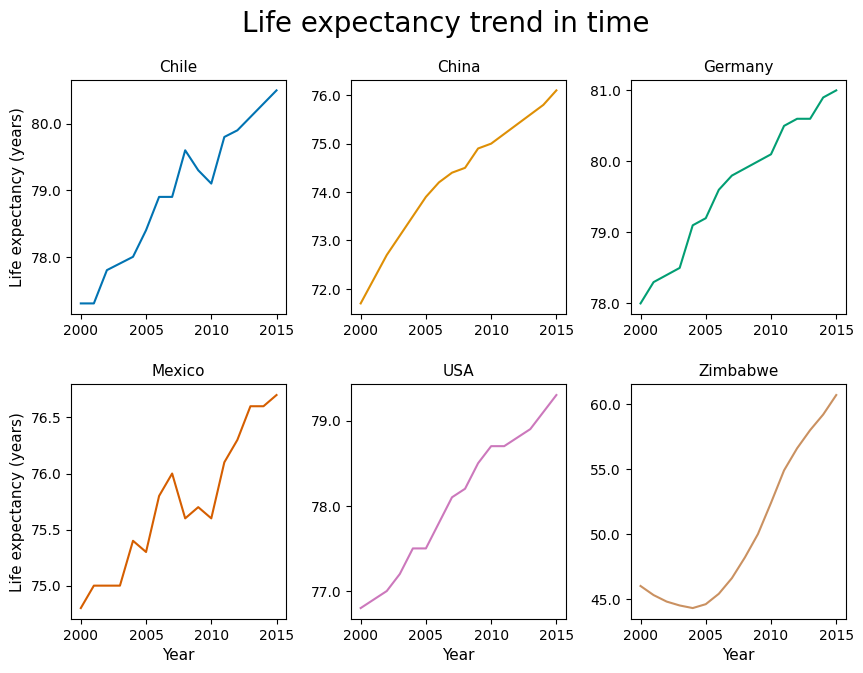

In [182]:
plt.figure(figsize=(10,7))

ax1 = plt.subplot(2,3,1)
sns.lineplot(data=df[df.Country == 'Chile'], x='Year',y='Life_expectancy',color=palette[0])
plt.ylabel('Life expectancy (years)',fontsize=11)
plt.xlabel('')
ax1.set_yticks([78,79,80])
ax1.set_yticklabels(['78.0','79.0','80.0'])
plt.title('Chile',fontsize=11)

ax2 = plt.subplot(2,3,2)
sns.lineplot(data=df[df.Country == 'China'], x='Year',y='Life_expectancy',color=palette[1])
plt.ylabel('')
plt.xlabel('')
ax2.set_yticks([72,73,74,75,76])
ax2.set_yticklabels(['72.0','73.0','74.0','75.0','76.0'])
plt.title('China',fontsize=11)

ax3 = plt.subplot(2,3,3)
sns.lineplot(data=df[df.Country == 'Germany'], x='Year',y='Life_expectancy',color=palette[2])
plt.ylabel('')
plt.xlabel('')
ax3.set_yticks([78,79,80,81])
ax3.set_yticklabels(['78.0','79.0','80.0','81.0'])
plt.title('Germany',fontsize=11)

ax4 = plt.subplot(2,3,4)
y_ticks_Mex = []
sns.lineplot(data=df[df.Country == 'Mexico'], x='Year',y='Life_expectancy',color=palette[3])
plt.ylabel('Life expectancy (years)',fontsize=11)
plt.xlabel('Year',fontsize=11)
plt.title('Mexico',fontsize=11)

ax5 = plt.subplot(2,3,5)
sns.lineplot(data=df[df.Country == 'United States of America'], x='Year',y='Life_expectancy',
             color=palette[4])
plt.ylabel('')
plt.xlabel('Year',fontsize=11)
ax5.set_yticks([77,78,79])
ax5.set_yticklabels(['77.0','78.0','79.0'])
plt.title('USA',fontsize=11)

ax6 = plt.subplot(2,3,6)
sns.lineplot(data=df[df.Country == 'Zimbabwe'], x='Year',y='Life_expectancy',color=palette[5])
plt.ylabel('')
plt.xlabel('Year',fontsize=11)
ax6.set_yticks([45,50,55,60])
ax6.set_yticklabels(['45.0','50.0','55.0','60.0'])
plt.title('Zimbabwe',fontsize=11)

plt.suptitle('Life expectancy trend in time',fontsize=20)
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

A similar analysis can be done for the trend in time of the GDP.

The first plot shows the trend for all countries (the color mapping is the same used in previous sections). The Unites States of America and China clearly display a growth in time, whereas the other countries seem to maintain an almost constant GDP. Notably, China increased its GDP by a factor 10, from just above a trillion to more than 10 trillion of U.S. dollars.

As for the life expectancy, to understand better the trend for each country, the second plot breaks out GDP by country. This plot allows to better distinguish the actual trend for each country, it shows that the GDP grew for all countries (at different speeds). However, Chile, Germany and Mexico all display a sudden decrease towards the end of the time considered in this study. Zimbabwe is the country with the lowest GDP, as seen previously. Its GDP actually decreased between 2000 and 2008, and started to rapidly increase from 2009. By 2015 it quadrupled with respect to 2000.

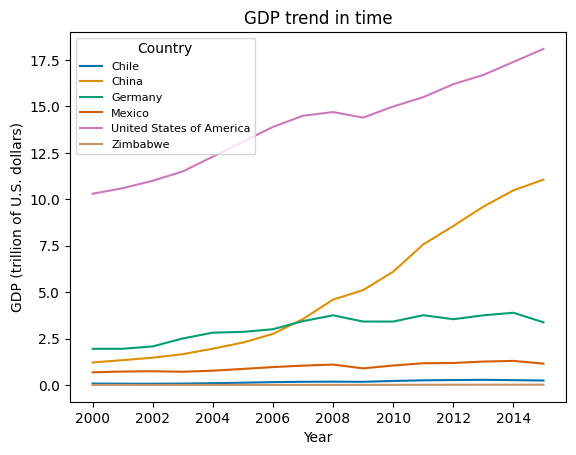

In [236]:
sns.lineplot(data=df, x='Year',y='GDP',hue='Country',palette='colorblind')
plt.ylabel('GDP (trillion of U.S. dollars)')
plt.title('GDP trend in time')
plt.legend(title='Country',fontsize=8)
ax = plt.subplot()
ax.set_yticks([0,2.5*10**12,5*10**12,7.5*10**12,10*10**12,12.5*10**12,
               15*10**12,17.5*10**12])
ax.set_yticklabels(['0.0','2.5','5.0','7.5','10.0','12.5','15.0','17.5'])
plt.show()

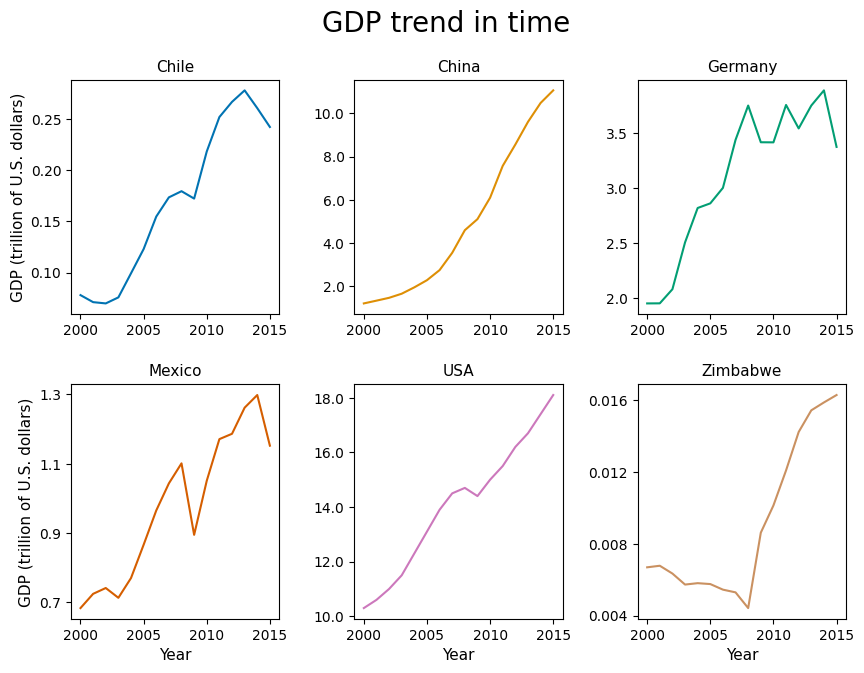

In [204]:
plt.figure(figsize=(10,7))

ax1 = plt.subplot(2,3,1)
sns.lineplot(data=df[df.Country == 'Chile'], x='Year',y='GDP',color=palette[0])
plt.ylabel('GDP (trillion of U.S. dollars)',fontsize=11)
plt.xlabel('')
ax1.set_yticks([10**11,1.5*10**11,2*10**11,2.5*10**11])
ax1.set_yticklabels(['0.10','0.15','0.20','0.25'])
plt.title('Chile',fontsize=11)

ax2 = plt.subplot(2,3,2)
sns.lineplot(data=df[df.Country == 'China'], x='Year',y='GDP',color=palette[1])
plt.ylabel('')
plt.xlabel('')
ax2.set_yticks([2*10**12,4*10**12,6*10**12,8*10**12,10*10**12])
ax2.set_yticklabels(['2.0','4.0','6.0','8.0','10.0'])
plt.title('China',fontsize=11)

ax3 = plt.subplot(2,3,3)
sns.lineplot(data=df[df.Country == 'Germany'], x='Year',y='GDP',color=palette[2])
plt.ylabel('')
plt.xlabel('')
ax3.set_yticks([2*10**12,2.5*10**12,3*10**12,3.5*10**12])
ax3.set_yticklabels(['2.0','2.5','3.0','3.5'])
plt.title('Germany',fontsize=11)

ax4 = plt.subplot(2,3,4)
y_ticks_Mex = []
sns.lineplot(data=df[df.Country == 'Mexico'], x='Year',y='GDP',color=palette[3])
plt.ylabel('GDP (trillion of U.S. dollars)',fontsize=11)
plt.xlabel('Year',fontsize=11)
ax4.set_yticks([0.7*10**12,0.9*10**12,1.1*10**12,1.3*10**12])
ax4.set_yticklabels(['0.7','0.9','1.1','1.3'])
plt.title('Mexico',fontsize=11)

ax5 = plt.subplot(2,3,5)
sns.lineplot(data=df[df.Country == 'United States of America'], x='Year',y='GDP',
             color=palette[4])
plt.ylabel('')
plt.xlabel('Year',fontsize=11)
ax5.set_yticks([10*10**12,12*10**12,14*10**12,16*10**12,18*10**12])
ax5.set_yticklabels(['10.0','12.0','14.0','16.0','18.0'])
plt.title('USA',fontsize=11)

ax6 = plt.subplot(2,3,6)
sns.lineplot(data=df[df.Country == 'Zimbabwe'], x='Year',y='GDP',color=palette[5])
plt.ylabel('')
plt.xlabel('Year',fontsize=11)
ax6.set_yticks([0.004*10**12,0.008*10**12,0.012*10**12,0.016*10**12])
ax6.set_yticklabels(['0.004','0.008','0.012','0.016'])
plt.title('Zimbabwe',fontsize=11)

plt.suptitle('GDP trend in time',fontsize=20)
plt.subplots_adjust(wspace=0.36,hspace=0.3)
plt.show()

## GDP vs Life expectancy
This section studies the correlation between GDP and life expectancy.

The following plots are focused on the relation between life expectancy and GDP. The first plot compares the relation for all countries, it seems that there is a positive linear relation between GDP and life expectancy, with the exception of Zimbabwe, where the GDP seems to remain constant, whereas the life expectancy increases.

To confirm these trends, the second plot breaks out the relation between GDP and life expectancy by country. All countries display a linear growth in time, with a particular mention for China, which seems to display an exponential growth. This plot allows to better discern that Zimbabwe display a positive linear relation as well.

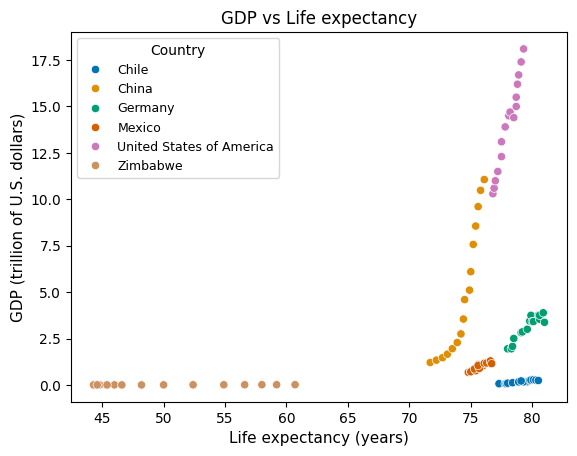

In [237]:
sns.scatterplot(data=df, y='GDP',x='Life_expectancy',hue='Country',palette='colorblind')
ax = plt.subplot()
ax.set_yticks([0,2.5*10**12,5*10**12,7.5*10**12,10*10**12,12.5*10**12,
               15*10**12,17.5*10**12])
ax.set_yticklabels(['0.0','2.5','5.0','7.5','10.0','12.5','15.0','17.5'])
plt.xlabel('Life expectancy (years)',fontsize=11)
plt.ylabel('GDP (trillion of U.S. dollars)',fontsize=11)
plt.title('GDP vs Life expectancy',fontsize=12)
plt.legend(title='Country',fontsize=9)
plt.show()

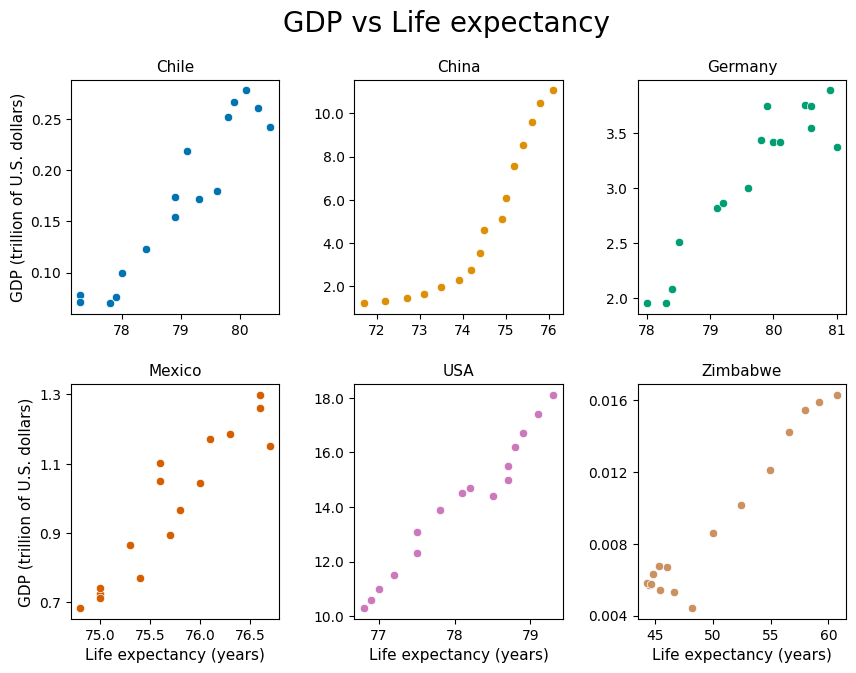

In [234]:
plt.figure(figsize=(10,7))

ax1 = plt.subplot(2,3,1)
sns.scatterplot(data=df[df.Country == 'Chile'], x='Life_expectancy',y='GDP',color=palette[0])
plt.ylabel('GDP (trillion of U.S. dollars)',fontsize=11)
plt.xlabel('')
ax1.set_yticks([10**11,1.5*10**11,2*10**11,2.5*10**11])
ax1.set_yticklabels(['0.10','0.15','0.20','0.25'])
plt.title('Chile',fontsize=11)

ax2 = plt.subplot(2,3,2)
sns.scatterplot(data=df[df.Country == 'China'], x='Life_expectancy',y='GDP',color=palette[1])
plt.ylabel('')
plt.xlabel('')
ax2.set_yticks([2*10**12,4*10**12,6*10**12,8*10**12,10*10**12])
ax2.set_yticklabels(['2.0','4.0','6.0','8.0','10.0'])
plt.title('China',fontsize=11)

ax3 = plt.subplot(2,3,3)
sns.scatterplot(data=df[df.Country == 'Germany'], x='Life_expectancy',y='GDP',color=palette[2])
plt.ylabel('')
plt.xlabel('')
ax3.set_yticks([2*10**12,2.5*10**12,3*10**12,3.5*10**12])
ax3.set_yticklabels(['2.0','2.5','3.0','3.5'])
plt.title('Germany',fontsize=11)

ax4 = plt.subplot(2,3,4)
y_ticks_Mex = []
sns.scatterplot(data=df[df.Country == 'Mexico'], x='Life_expectancy',y='GDP',color=palette[3])
plt.ylabel('GDP (trillion of U.S. dollars)',fontsize=11)
plt.xlabel('Life expectancy (years)',fontsize=11)
ax4.set_yticks([0.7*10**12,0.9*10**12,1.1*10**12,1.3*10**12])
ax4.set_yticklabels(['0.7','0.9','1.1','1.3'])
plt.title('Mexico',fontsize=11)

ax5 = plt.subplot(2,3,5)
sns.scatterplot(data=df[df.Country == 'United States of America'], x='Life_expectancy',y='GDP',
             color=palette[4])
plt.ylabel('')
plt.xlabel('Life expectancy (years)',fontsize=11)
ax5.set_yticks([10*10**12,12*10**12,14*10**12,16*10**12,18*10**12])
ax5.set_yticklabels(['10.0','12.0','14.0','16.0','18.0'])
plt.title('USA',fontsize=11)

ax6 = plt.subplot(2,3,6)
sns.scatterplot(data=df[df.Country == 'Zimbabwe'], x='Life_expectancy',y='GDP',color=palette[5])
plt.ylabel('')
plt.xlabel('Life expectancy (years)',fontsize=11)
ax6.set_yticks([0.004*10**12,0.008*10**12,0.012*10**12,0.016*10**12])
ax6.set_yticklabels(['0.004','0.008','0.012','0.016'])
plt.title('Zimbabwe',fontsize=11)

plt.suptitle('GDP vs Life expectancy',fontsize=20)
plt.subplots_adjust(wspace=0.36,hspace=0.3)
plt.show()

## Conclusion
This project allowed to highlight some interesting insights on life expectancy and GDP for six different countries for a period of 16 years, from 2000 to 2015. The key takeaways are the following:

- All countries displayed an increase in life expectancy. Particularly interesting is the case of Zimbabwe; while it is the country with the lowest life expectancy, it is also the one who showed the biggest increase.
- GDP has also increase for all countries. Notably, China increase their GDP by a factor 10, from just above a trillion to more than 10 trillion of U.S. dollars.
- There is a positive correlation between GDP and life expectancy for the countries considered in this study.